In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
video_sales = pd.read_csv("vgsales.csv")

In [3]:
video_sales.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12325,12327,Crimson Gem Saga,PSP,2008.0,Role-Playing,Sega,0.06,0.00,0.0,0.00,0.06
4840,4842,Rocket Power: Dream Scheme,GBA,2001.0,Action,THQ,0.29,0.11,0.0,0.01,0.40
15664,15667,Rabbids Invasion: The Interactive TV Show,PS4,2014.0,Misc,Ubisoft,0.00,0.01,0.0,0.00,0.02
13198,13200,Pinball Tycoon,GBA,2002.0,Misc,Ignition Entertainment,0.03,0.01,0.0,0.00,0.05
14289,14292,Arthur and the Invisibles,DS,2007.0,Adventure,Atari,0.03,0.00,0.0,0.00,0.03


"""Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales."""

In [4]:
video_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
video_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
video_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
drop_row_index = video_sales[video_sales['Year'] > 2016].index
video_sales = video_sales.drop(drop_row_index)

In [8]:
video_sales.dropna(subset=['Year','Publisher'],inplace=True)

What genre games have been made the most?

In [9]:
video_sales['Genre'].value_counts()

Action          3250
Sports          2304
Misc            1686
Role-Playing    1468
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       847
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

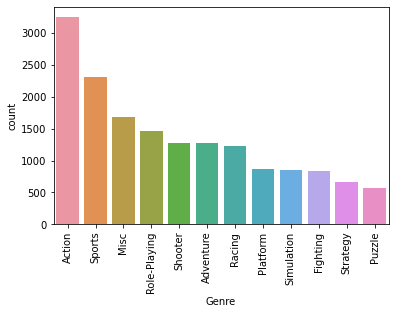

In [10]:
#video_sales['Genre'].value_counts().plot(kind='bar')
sns.countplot(x="Genre", data=video_sales, order = video_sales['Genre'].value_counts().index)
plt.xticks(rotation=90)

Which year had the most game release?

In [11]:
video_sales['Year']=video_sales['Year'].apply(lambda x: int(str(x).replace('.0','')))

In [12]:
video_sales['Year'].value_counts()[:10]

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
Name: Year, dtype: int64

In [13]:
#video_sales['Year'].value_counts().plot(kind = 'bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2010'),
  Text(3, 0, '2007'),
  Text(4, 0, '2011'),
  Text(5, 0, '2006'),
  Text(6, 0, '2005'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004')])

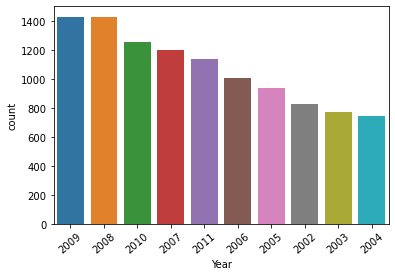

In [14]:
sns.countplot(x="Year", data=video_sales, order = video_sales['Year'].value_counts()[:10].index)
plt.xticks(rotation=40)

In [15]:
video_sales.loc[:,['Rank','Name','Publisher']][:10]

,Rank,Name,Publisher
0,1,Wii Sports,Nintendo
1,2,Super Mario Bros.,Nintendo
2,3,Mario Kart Wii,Nintendo
3,4,Wii Sports Resort,Nintendo
4,5,Pokemon Red/Pokemon Blue,Nintendo
5,6,Tetris,Nintendo
6,7,New Super Mario Bros.,Nintendo
7,8,Wii Play,Nintendo
8,9,New Super Mario Bros. Wii,Nintendo
9,10,Duck Hunt,Nintendo


TOP 10 PUBISHER

In [16]:
video_sales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False)

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
                                ... 
Ertain                             1
Epic Games                         1
Seventh Chord                      1
Enjoy Gaming ltd.                  1
MLB.com                            1
Name: Year, Length: 576, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive')])

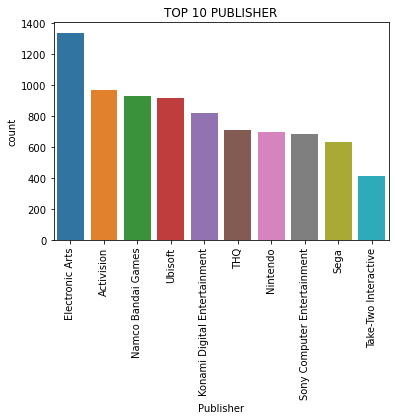

In [17]:
plt.title(label='TOP 10 PUBLISHER')
sns.countplot(x='Publisher',data=video_sales,order=video_sales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False)[:10].index)
plt.xticks(rotation=90)

HIGHEST NO. OF GENRE RELEASE BY YEAR

In [18]:
video_sales.groupby(by=['Year'])['Name'].count().sort_values(ascending=False)[:10]

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
Name: Name, dtype: int64

In [19]:
video_sales['Year'].value_counts().iloc[:5]

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
Name: Year, dtype: int64

<AxesSubplot:title={'center':'Highest Genre releases By Year'}, xlabel='Year', ylabel='count'>

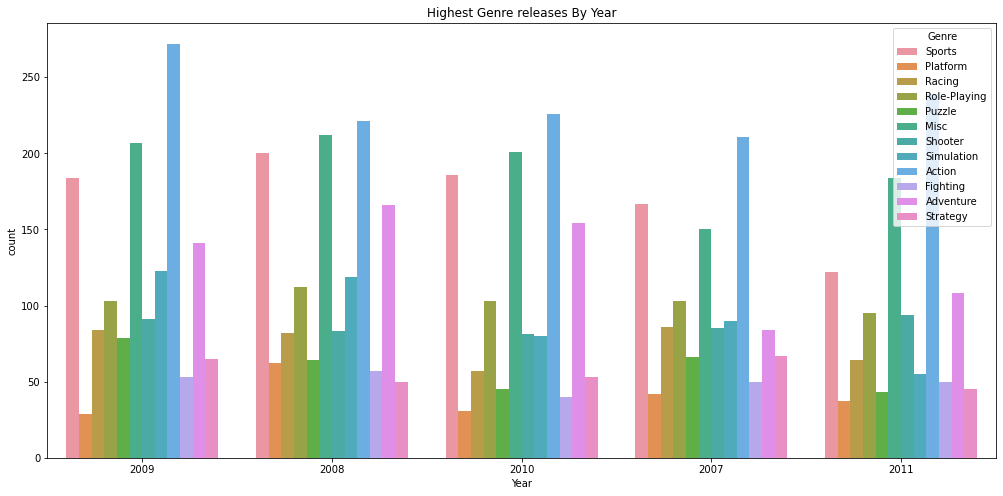

In [20]:
plt.figure(figsize=(17,8))
plt.title(label='Highest Genre releases By Year')
sns.countplot(data=video_sales,order=video_sales['Year'].value_counts().iloc[:5].index,hue='Genre',x = 'Year')

HIGHEST GOLBAL SALE BY YEAR

In [21]:
video_sales.groupby(by=['Year'])['Global_Sales'].sum().sort_values(ascending=False)[:10]

Year
2008    678.90
2009    667.30
2007    609.92
2010    600.29
2006    521.04
2011    515.80
2005    458.51
2004    414.01
2002    395.52
2013    368.11
Name: Global_Sales, dtype: float64

<AxesSubplot:title={'center':'Highest Global Sale By Year'}, xlabel='Year', ylabel='count'>

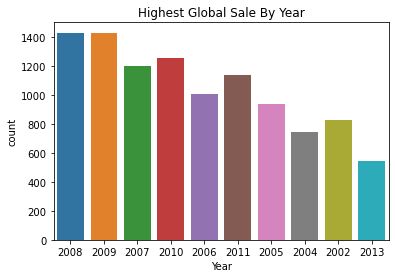

In [22]:
#top 10 
plt.title(label='Highest Global Sale By Year')
sns.countplot(data=video_sales,order=video_sales.groupby(by=['Year'])['Global_Sales'].sum().sort_values(ascending=False)[:10].index,x = 'Year')

HIGHEST GLOBAL SALE BY GENRE

In [23]:
video_sales.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending=False)

Genre
Action          1722.83
Sports          1309.24
Shooter         1026.20
Role-Playing     923.79
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.69
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

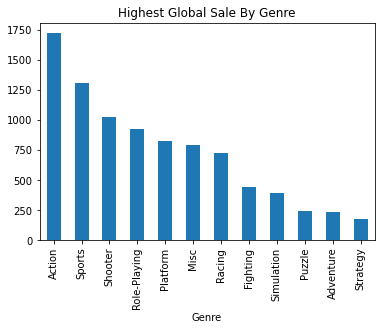

In [24]:
plt.title(label='Highest Global Sale By Genre')
#sns.countplot(data=video_sales,order=video_sales.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending=False).index,x = 'Genre')
video_sales.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)

HIGHEST GLOBAL SALE BY PUBLISHER 

In [25]:
video_sales.groupby(by=['Publisher'])['Global_Sales'].sum().sort_values(ascending=False)[:10]

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.25
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.66
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games')])

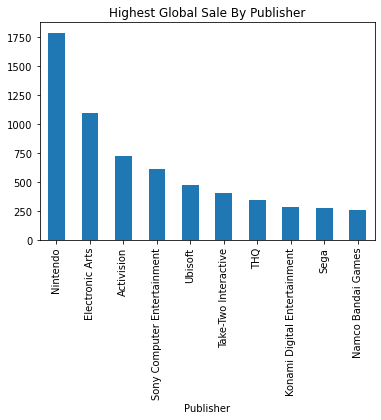

In [26]:
plt.title(label='Highest Global Sale By Publisher')
video_sales.groupby(by=['Publisher'])['Global_Sales'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xticks(rotation=90)

HIGHEST GLOBAL SALE BY PLATFORM 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC')])

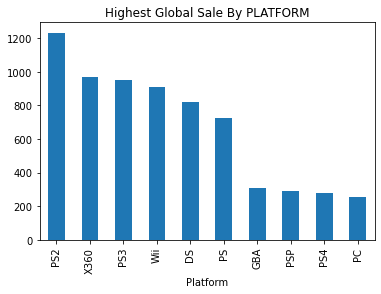

In [27]:
plt.title(label='Highest Global Sale By PLATFORM')
video_sales.groupby(by=['Platform'])['Global_Sales'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xticks(rotation=90)

In [28]:
video_sales.groupby(by=['Platform'])['Global_Sales'].sum().sort_values(ascending=False)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.62
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.07
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.58
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

DISTRIBUTION OF DATA

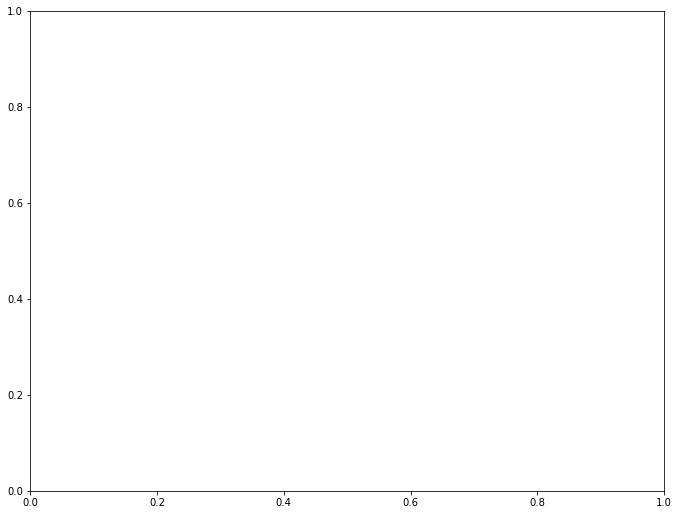

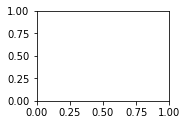

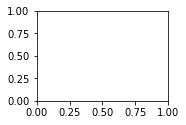

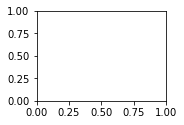

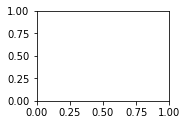

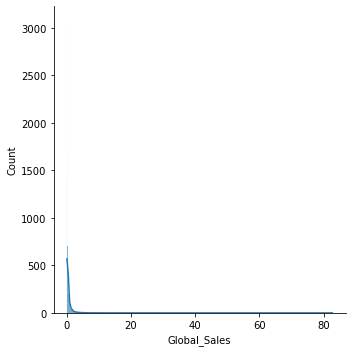

In [29]:
plt.figure(figsize=(25,30))

plt.subplot(3,2,1)
sns.displot(video_sales['NA_Sales'],kde=True)
plt.subplot(3,2,2)
sns.displot(video_sales['EU_Sales'],kde=True)
plt.subplot(3,2,3)
sns.displot(video_sales['JP_Sales'],kde=True)
plt.subplot(3,2,4)
sns.displot(video_sales['Other_Sales'],kde=True)
plt.subplot(3,2,5)
sns.displot(video_sales['Global_Sales'],kde=True)

DATA DISTRIBUTION AFTER LOG TRANSFORM

In [30]:
data = video_sales.copy()

In [31]:
data = data[data['NA_Sales'] !=0] 
data = data[data['JP_Sales'] !=0] 
data = data[data['EU_Sales'] !=0] 
data = data[data['Other_Sales'] !=0] 

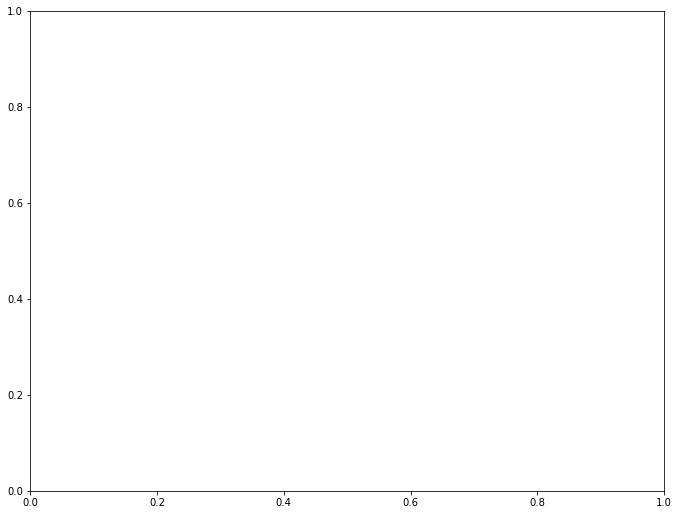

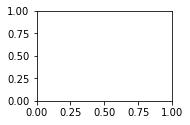

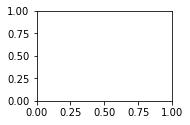

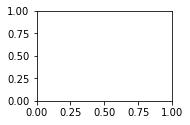

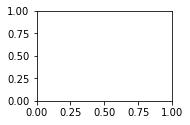

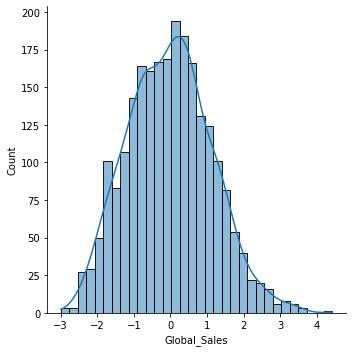

In [32]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i,columns in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.displot(np.log(data[columns]),kde = True)
    

In [33]:
NA=(video_sales['NA_Sales'].sum()/video_sales['Global_Sales'].sum())*100
JP=(video_sales['JP_Sales'].sum()/video_sales['Global_Sales'].sum())*100
OP=(video_sales['Other_Sales'].sum()/video_sales['Global_Sales'].sum())*100
EU=(video_sales['EU_Sales'].sum()/video_sales['Global_Sales'].sum())*100

PIE CHART OF REGION SALE

In [34]:
n_sales = [video_sales['NA_Sales'].sum(),video_sales['JP_Sales'].sum(),video_sales['Other_Sales'].sum(),video_sales['EU_Sales'].sum()]

In [35]:
labels = video_sales.iloc[:,[6,7,8,9]].columns

In [36]:
labels

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

([<matplotlib.patches.Wedge at 0x20c20770f10>,
 [Text(-1.0995935701942505, 0.0298995048029609, 'NA_Sales'),
  Text(0.43212848659403696, -1.0115656039397283, 'EU_Sales'),
  Text(1.0009696240112496, -0.45613573835732024, 'JP_Sales'),
  Text(0.832539140037497, 0.7189426822116108, 'Other_Sales')],
 [Text(-0.5997783110150456, 0.016308820801615036, '49.13%'),
  Text(0.23570644723311102, -0.5517630566943972, '14.58%'),
  Text(0.5459834312788634, -0.24880131183126555, '8.96%'),
  Text(0.454112258202271, 0.39215055393360587, '27.33%')])

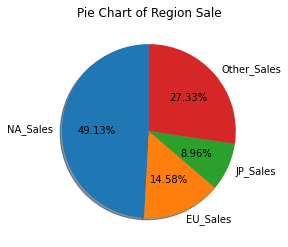

In [37]:
plt.title("Pie Chart of Region Sale")
plt.pie(x=n_sales,labels=labels,autopct='%2.2f%%',shadow=True, startangle=90)

COMPARISION

In [38]:
comp_genre = video_sales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum() 

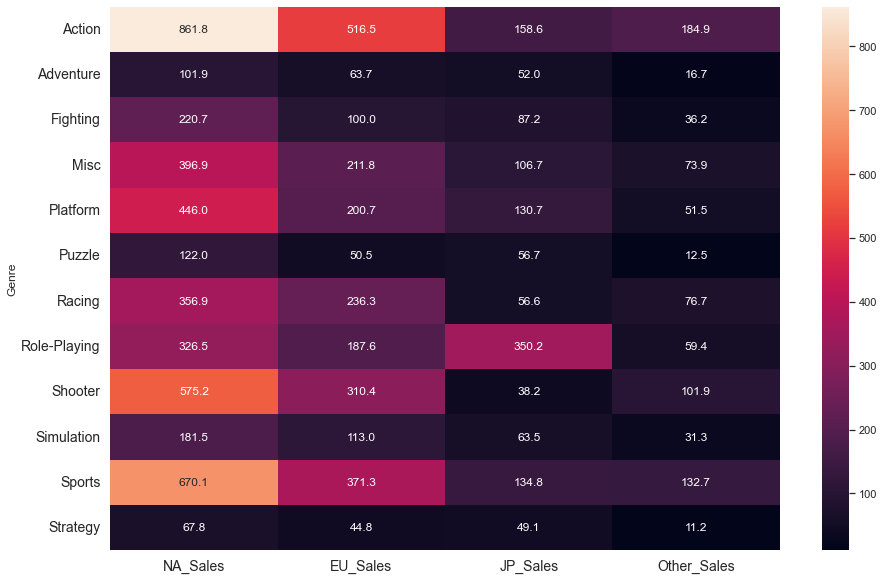

In [39]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [40]:
video_sales.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [41]:
top_game = video_sales.sort_values(by=['Global_Sales'],ascending=False)

In [42]:
a = top_game[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Super Mario Bros.'),
  Text(2, 0, 'Mario Kart Wii'),
  Text(3, 0, 'Wii Sports Resort'),
  Text(4, 0, 'Pokemon Red/Pokemon Blue'),
  Text(5, 0, 'Tetris'),
  Text(6, 0, 'New Super Mario Bros.'),
  Text(7, 0, 'Wii Play'),
  Text(8, 0, 'New Super Mario Bros. Wii'),
  Text(9, 0, 'Duck Hunt')])

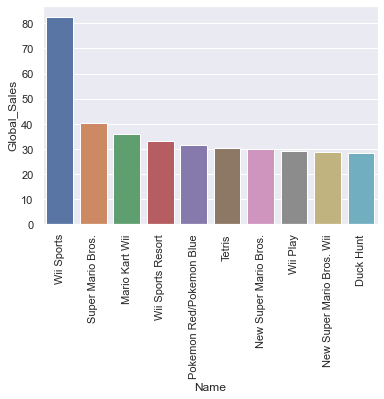

In [43]:
sns.barplot(x='Name', y='Global_Sales', data=a)
plt.xticks(rotation=90)

In [44]:
data_pair = video_sales.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00
16594,2003,GC,Shooter,0.01,0.00,0.00
16595,2008,PS2,Racing,0.00,0.00,0.00
16596,2010,DS,Puzzle,0.00,0.01,0.00


RELATION BETWEEN COLUMNS

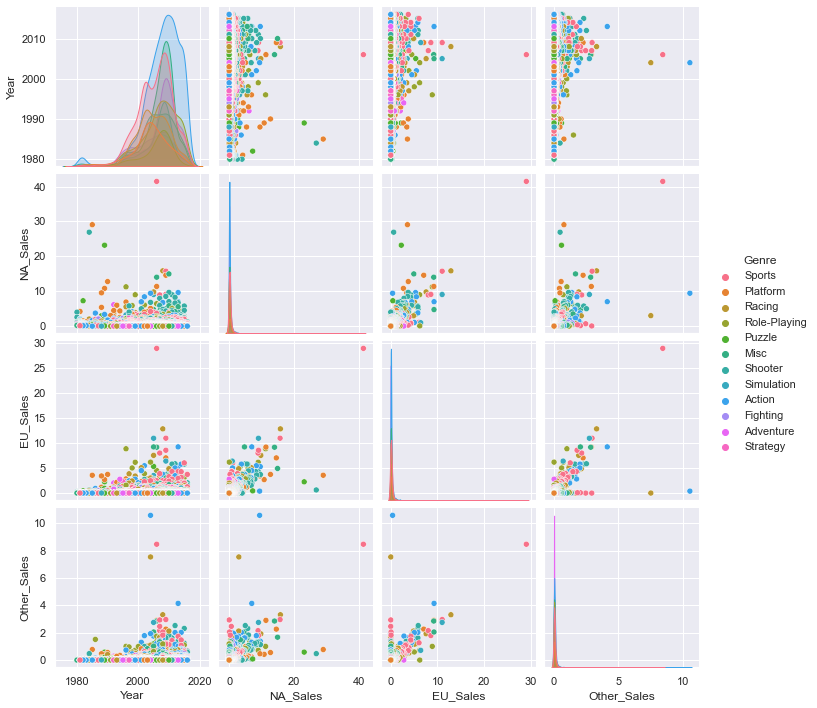

In [45]:
sns.pairplot(data_pair, hue='Genre')